## Getting Started

In [1]:
from bls_transformer import BLS
import json
import numpy as np
import pandas as pd
#Importing the necessary packages

In [2]:
series_id=['CUUR0000SA0',
'CES0500000003',
'APU00007471A',
'APU000072610',
'CES0500000002',
'CES3133100002',
'CES3231300002',
'CES3133200002',
'CES3232200002',
'CEU6500000002',
'CES3232300002'
]
start_year='2006'
end_year='2022'
with open('config.json','r') as json_file:
    reg_key=json.load(json_file) #Get your API key @ https://data.bls.gov/registrationEngine/

#Initializing variables
#Alternatively, we could create a config.json file

## Using The 'BLS_transformer' Class

In [3]:
bls=BLS.API(series_id=series_id,start_year=start_year,end_year=end_year,registration_key=reg_key['registrationkey'])
#Intializes the BLS object
#A config.json will be passed using the 'config' parameter

Request Status: REQUEST_SUCCEEDED


In [6]:
bls.transform_json()
#Converting the Python dict to a dictionary of DataFrames

AttributeError: 'API' object has no attribute 'transform_json'

## Accessing The bls Object

In [231]:
df1=bls.get_DataFrame(id=['CUUR0000SA0',
'CES0500000003',
'APU00007471A',
'APU000072610'])

df2=bls.get_DataFrame(index=[i for i in range(5,len(series_id))])

#Accessing the DataFrames by series ID(s)

In [293]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)
#Removing null values

In [233]:
df1.tail()
#Viewing the accessed DF

CUUR0000SA0                           CES0500000003         \
                   Year Period Period Name  Value          Year Period   
Year Period                                                              
2006 7             2006      7        July  203.5          2006      7   
     6             2006      6        June  202.9          2006      6   
     5             2006      5         May  202.5          2006      5   
     4             2006      4       April  201.5          2006      4   
     3             2006      3       March  199.8          2006      3   

                               APU00007471A                            \
            Period Name  Value         Year Period Period Name  Value   
Year Period                                                             
2006 7             July   20.3         2006      7        July  3.046   
     6             June  20.22         2006      6        June  2.963   
     5              May  20.13         2006      5         May  2.993   
     4            April  20.16         2006      4       April  2.801   
     3            March  20.04         2006      3       March  2.444   

            APU000072610                            
                    Year Period Period Name  Value  
Year Period                                         
2006 7              2006      7        July  0.118  
     6              2006      6        June  0.118  
     5              2006      5         May   0.11  
     4              2006      4       April  0.109  
     3              2006      3       March  0.109

In [234]:
standardized_cpi=df1['CUUR0000SA0']['Value'].iloc[-1]
df1[('Real Amounts','Standardized CPI')]=df1['CUUR0000SA0']['Value'].apply(lambda x: x/standardized_cpi)
#Standardizing CPI

In [235]:
df1[('Real Amounts','Real Wages')]=df1['CES0500000003']['Value']/df1['Real Amounts']['Standardized CPI']
df1[('Real Amounts','Real Cost of Gas')]=df1['APU00007471A']['Value']/df1['Real Amounts']['Standardized CPI']
df1[('Real Amounts','Real Cost of Electricity')]=df1['APU000072610']['Value']/df1['Real Amounts']['Standardized CPI']
#Using the standardized CPI to calculate Real amounts (as opposed to Nominal)

In [236]:
df1[('Real % Changes','Change in Real Wages')]=df1[('Real Amounts','Real Wages')][::-1].pct_change()
df1[('Real % Changes','Change in Real Cost of Gas')]=df1[('Real Amounts','Real Cost of Gas')][::-1].pct_change()
df1[('Real % Changes','Change in Real Cost of Electricity')]=df1[('Real Amounts','Real Cost of Electricity')][::-1].pct_change()
#Calculating the Percentage Change from Period to Period

In [294]:
df_transf1=pd.melt(frame=df1,id_vars=[('CUUR0000SA0','Year'),('CUUR0000SA0','Period')],
                            value_vars=[('Real % Changes','Change in Real Wages'),
                            ('Real % Changes','Change in Real Cost of Gas'),
                            ('Real % Changes','Change in Real Cost of Electricity')])
#Transforming the Data to be more easily read by graphing libraries

In [295]:
df2.tail()

CES3133100002                          CES3231300002         \
                     Year Period Period Name Value          Year Period   
Year Period                                                               
2006 7               2006      7        July  41.4          2006      7   
     6               2006      6        June  41.6          2006      6   
     5               2006      5         May  41.7          2006      5   
     4               2006      4       April  40.9          2006      4   
     3               2006      3       March  41.9          2006      3   

                              CES3133200002         ... CES3232200002        \
            Period Name Value          Year Period  ...   Period Name Value   
Year Period                                         ...                       
2006 7             July  39.4          2006      7  ...          July  40.7   
     6             June  39.2          2006      6  ...          June  40.7   
     5              May  39.5          2006      5  ...           May  40.8   
     4            April  39.5          2006      4  ...         April  40.4   
     3            March  40.0          2006      3  ...         March  40.2   

            CEU6500000002                          CES3232300002         \
                     Year Period Period Name Value          Year Period   
Year Period                                                               
2006 7               2006      7        July  32.9          2006      7   
     6               2006      6        June  32.6          2006      6   
     5               2006      5         May  32.4          2006      5   
     4               2006      4       April  32.8          2006      4   
     3               2006      3       March  32.5          2006      3   

                               
            Period Name Value  
Year Period                    
2006 7             July  37.6  
     6             June  37.6  
     5              May  37.3  
     4            April  37.5  
     3            March  37.6  

[5 rows x 24 columns]

## Graphing The bls Object

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as plotly
import plotly.graph_objects as go

%matplotlib inline
#Importing graphing libraries

In [240]:
df_transf1.rename({'variable_1':'Item'},axis=1,inplace=True)
#Renaming the variables column for the Plot Legend
df_transf1['value']=df_transf1['value'].apply(lambda x: float((x*100)))
#Converting decimals to percentages

Text(0.5, 1.0, 'Change in Real Value')

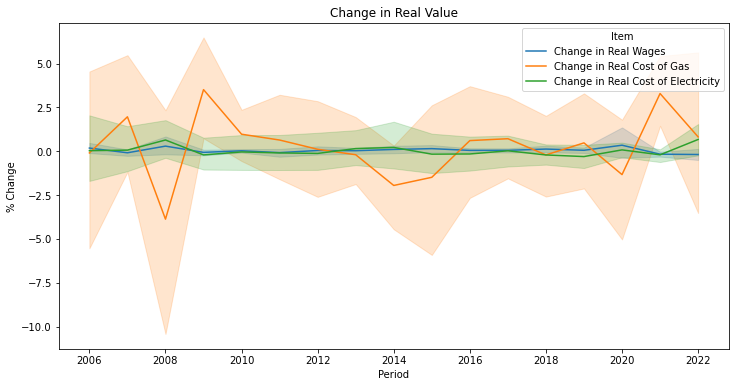

In [286]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_transf1,x=('CUUR0000SA0','Year'),y='value',hue='Item')
plt.xlabel('Period')
plt.ylabel('% Change')
plt.title('Change in Real Value')
#Plotting

Text(0.5, 1.0, 'Average Change in Real Value by Month (15-year Period)')

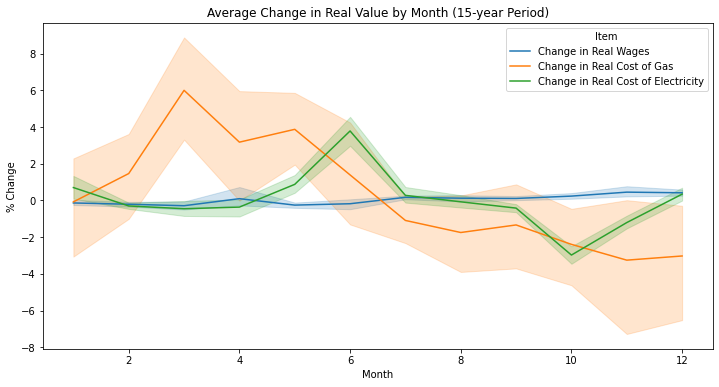

In [287]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_transf1[df_transf1[('CUUR0000SA0','Year')]>=2006],x=('CUUR0000SA0','Period'),y='value',hue='Item')
plt.xlabel('Month')
plt.ylabel('% Change')
plt.title('Average Change in Real Value by Month (15-year Period)')
#Plotting with a filter